## Contents

1. [Importing Libraries and Dataframes](#1.-Importing-Libraries-and-Dataframes)   
2. [Addressing PII data](#2.-Adressing-PII-data)   
3. [Comparing customer behaviour in different geographic regions](#3.-Comparing-customer-behaviour-in-different-geographic-regions)    
    3.1 [Creating a regional segmentation of the data](#3.1-Creating-a-regional-segmentation-of-the-data)    
    3.2 [Checking differences in spending habits across U.S regions](#3.2-Checking-differences-in-spending-habits-across-U-S-regions)     
4. [Creating an exclusion flag for low-activity customers](#4.-Creating-an-exclusion-flag-for-low-activity-customers)    
    4.1 [Exporting the active-users dataframe](#4.1-Exporting-the-active-users-dataframe)    
5. [Creating a profiling variable based on age](#5.-Creating-a-profiling-variable-based-on-age)     
    5.1 [Creating a pie chart to show the distribution of ages](#5.1-Creating-a-pie-chart-to-show-the-distribution-of-ages)   
    5.2 [Aggregating the max, mean, and min variables of the age profile for usage frequency and expenditure](#5.2-Aggregating-the-max,-mean,-and-min-variables-of-the-age-profile-for-usage-frequency-and-expenditure)   
    5.3 [Comparing age profile by region](#5.3-Comparing-age-profile-by-region)    
    5.4 [Comparing age region by loyalty](#5.4-Comparing-age-region-by-loyalty)     
    5.5 [Creating a data dictionary for department_id](#5.5-Creating-a-data-dictionary-for-department-id)    
    5.6 [Comparing age profile by department_id](#5.6-Comparing-age-profile-by-department-id)    
6. [Creating a profiling variable based on Income](#6.-Creating-a-profiling-variable-based-on-Income)    
    6.1 [Creating a pie chart to show the distribution of Income](#6.1-Creating-a-pie-chart-to-show-the-distribution-of-Income) 
    6.2 [Aggregating the max, mean, and min variables of the Income profile for usage frequency and expenditure](#6.2-Aggregating-the-max,-mean,-and-min-variables-of-the-Income-profile-for-usage-frequency-and-expenditure)   
    6.3 [Comparing Income profile by region](#6.3-Comparing-Income-profile-by-region)    
    6.4 [Comparing Income profile by department_id](#6.4-Comparing-Income-profile-by-department-id)     
7. [Creating a profiling variable based on number of dependants](#7.-Creating-a-profiling-variable-based-on-number-of-dependants)    
    7.1 [Creating visualisations to show the distribution of number of dependants](#7.1-Creating-visualisations-to-show-the-distribution-of-number-of-dependants)   
    7.2 [Aggregating the max, mean, and min variables of the dependants profile for usage frequency and expenditure](#7.2-Aggregating-the-max,-mean-and-min-variables-of-the-dependants-profile-for-usage-frequency-and-expenditure)   
    7.3 [Comparing dependants profile by region](#7.3-Comparing-dependants-profile-by-region)   
    7.4 [Comparing dependants by department_id](#7.4-Comparing-dependants-by-department-id)   
8. [Checking order frequencies by Region](#8.-Checking-order-frequencies-by-Region)    
    8.1 [Creating a bar chart to show the number of orders by region](#8.1-Creating-a-bar-chart-to-show-the-number-of-orders-by-region)   
9. [Creating a bar chart to show the busiest department by orders at 11am](#9.-Creating-a-bar-chart-to-show-the-busiest-department-by-orders-at-11am)   
10. [Creating a pie chart to show the price_range_loc on spending](#10.-Creating-a-pie-chart-to-show-the-price-range-loc-on-spending)   
11. [Exporting Visualisations](#11.-Exporting-Visualisations)   

## 1. Importing Libraries and Dataframes

In [1]:
# Importing Libraries and Dataframe

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing df_combined
path = r'C:\Users\User 1\Documents\Instacart Basket Analysis 04-2023'

In [3]:
df_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_combined.pkl'))

In [4]:
df_combined.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,full_name,order_id,...,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_frequency,order_frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,Deborah Esquivel,2543867,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,Deborah Esquivel,1285508,...,Mid-range product,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,Deborah Esquivel,2578584,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,Deborah Esquivel,423547,...,Mid-range product,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,Deborah Esquivel,2524893,...,Mid-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [5]:
df_combined.shape

(32404859, 32)

## 2. Addressing PII data

In [6]:
df_combined = df_combined.drop(columns = ['full_name'])

In [7]:
df_combined.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,order_number,...,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_frequency,order_frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Mid-range product,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Mid-range product,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Mid-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


The full_name column has been dropped because although full_name isn't a direct identifier and thus cannot be used alone to identify an individual, it can be used to aggressively narrow down an individual. Especially when used in conjunction with the state, age and gender columns.

## 3. Comparing customer behaviour in different geographic regions


### 3.1 Creating a regional segmentation of the data

In [8]:
# Creating states within regions
region = []

for value in df_combined['state']:
	if value=='Maine' or value=='New Hampshire' or value=='Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value =='New Jersey':
		region.append('Northeast')
	elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
		region.append('Midwest')
	elif value == 'Idaho' or value == 'Montana' or value == 'Wyoming' or value == 'Nevada' or value == 'Utah' or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico' or value == 'Alaska' or value == 'Washington' or value == 'Oregon' or value == 'California' or value == 'Hawaii':
		region.append('West')
	else:
		region.append('South')

In [9]:
# creating the region column
df_combined['region'] = region

In [10]:
df_combined['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

### 3.2 Checking differences in spending habits across U.S regions

In [11]:
region_spend = pd.crosstab(df_combined['region'], df_combined['spending_flag'], dropna = False)

In [12]:
region_spend

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40564,10751321
West,31223,8261690


The South have the biggest overall spenders. The Northeast has the lowest.
Across all regions, the majority of customers are low spenders.

## 4. Creating an exclusion flag for low-activity customers


In [13]:
# Creating the exclusion flag
df_combined.loc[df_combined['max_order'] < 5, 'activity_flag'] = 'inactive'

In [14]:
df_combined.loc[df_combined['max_order'] > 5, 'activity_flag'] = 'active'

In [15]:
df_combined['activity_flag'].value_counts(dropna = False)

active      30171424
inactive     1440295
NaN           793140
Name: activity_flag, dtype: int64

In [16]:
# Creating an active_users customer subset
df_active_users = df_combined.loc[df_combined['activity_flag'] == 'active']

In [17]:
# Checking the active users table
df_active_users.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,order_number,...,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_frequency,order_frequency_flag,region,activity_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,active
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,active
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,active
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,active
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,active


### 4.1 Exporting the active-users dataframe

In [18]:
# Exporting the subset
df_active_users.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_users.pkl'))

## 5. Creating a profiling variable based on age

In [19]:
# Checking the descriptive statistics of 'age' and 'income'
df_combined[['age', 'income']].describe()

,age,income
count,3.240486e+07,3.240486e+07
mean,4.946527e+01,9.943773e+04
std,1.848558e+01,4.305727e+04
min,1.800000e+01,2.590300e+04
25%,3.300000e+01,6.700400e+04
50%,4.900000e+01,9.661800e+04
75%,6.500000e+01,1.279120e+05
max,8.100000e+01,5.939010e+05


In [20]:
# Creating an age_flag
df_combined.loc[(df_combined['age'] <= 40), 'age_profile'] = '18-40'

In [21]:
df_combined.loc[(df_combined['age'] > 40) & (df_combined['age'] <= 60), 'age_profile'] = '40-60'

In [22]:
df_combined.loc[(df_combined['age'] > 60), 'age_profile'] = '60+'

In [23]:
df_combined['age_profile'].value_counts(dropna = False)

18-40    11670046
60+      10582839
40-60    10151974
Name: age_profile, dtype: int64

### 5.1 Creating a pie chart to show the distribution of ages

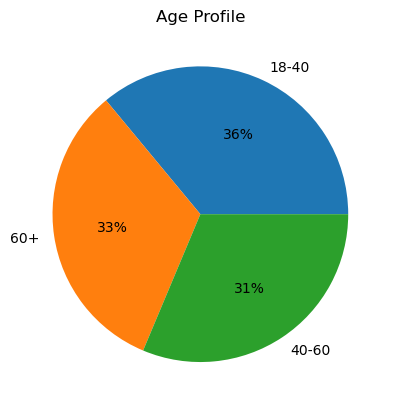

In [24]:
# age pie chart
age_profile_pie = df_combined['age_profile'].value_counts().plot.pie(title ='Age Profile', label = '', autopct=('%1.f%%'))

### 5.2 Aggregating the max, mean, and min variables of the age profile for usage frequency and expenditure

In [25]:
# Age Aggregated with usage frequency and expenditure
age_agg = df_combined.groupby(['age_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})

In [26]:
age_agg

days_since_prior_order                  prices                  \
                               min   max       mean    min   max      mean   
age_profile                                                                  
18-40                          0.0  30.0  11.109790    1.0  25.0  7.785757   
40-60                          0.0  30.0  11.119174    1.0  25.0  7.790087   
60+                            0.0  30.0  11.083299    1.0  25.0  7.795148   

                          
                     sum  
age_profile               
18-40        90860139.83  
40-60        79084761.88  
60+          82494791.12

### 5.3 Comparing age profile by region

Across all age profiles, customers have on average 11 days between their orders. In addition, the maximum time a returning customer places their order is monthly (30 days). As for expenditure, across all age profiles, customes have the same expenditure.

In [27]:
#Creating a crosstab to compare age profiles across regions
cross_age_region = pd.crosstab(index = df_combined['age_profile'],
                                   columns = df_combined['region'], normalize = 'index')

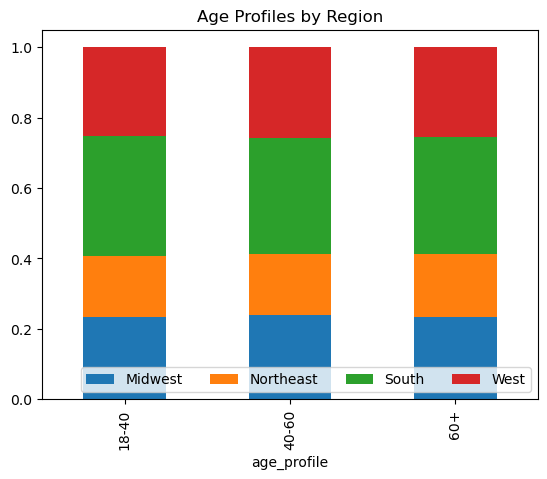

In [28]:
#Create a bar chart to visualize the relation between age profile and loyalty

bar_age_region = cross_age_region.plot(kind = 'bar', stacked = True)
plt.legend(loc = 'lower right', ncol = 4) 

plt.title('Age Profiles by Region')
plt.show()

### 5.4 Comparing age profile by loyalty

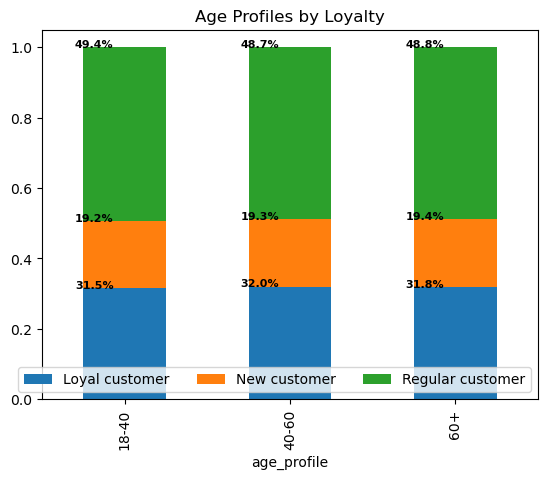

<Figure size 640x480 with 0 Axes>

In [29]:
# Create a crosstab to compare age profile and loyalty flag
# Normalizing the index to get row percentages

cross_loyalty_age =  pd.crosstab(index = df_combined['age_profile'], 
                                         columns = df_combined['loyalty_flag'], 
                                         normalize = 'index')

#Create a bar chart to visualize the relation between age profile and loyalty

bar_loyalty_age = cross_loyalty_age.plot(kind = 'bar', stacked = True)
plt.legend(loc = 'lower right', ncol = 4) 

for n, x in enumerate([*cross_loyalty_age.index.values]):
    for (proportion, y_loc) in zip(cross_loyalty_age.loc[x],
                               cross_loyalty_age.loc[x].cumsum()):
            
        plt.text(x= n -0.30, 
            y= y_loc,
            s= f'{np.round(proportion * 100, 1)}%',
            color ='black', 
            fontsize = 8,
            fontweight = 'bold')

plt.title('Age Profiles by Loyalty')
plt.show()
plt.tight_layout()

In [105]:
# loyalty aggregation by expenditure and usage frequency
loyalty_agg = df_combined.groupby(['loyalty_flag']).agg({'prices' : ['min', 'max', 'mean']})

In [106]:
loyalty_agg

prices                
                    min   max      mean
loyalty_flag                           
Loyal customer      1.0  25.0  7.772831
New customer        1.0  25.0  7.800320
Regular customer    1.0  25.0  7.797431

In [30]:
#Exporting the stacked bar chart visualisation 
bar_loyalty_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_loyalty_age.stck_bar.png'))


### 5.5 Creating a data dictionary for department_id

In [31]:
# Importing department dataframe
path = r'C:\Users\User 1\Documents\Instacart Basket Analysis 04-2023'
df_department = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [32]:
df_department

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [33]:
# Transposing df_department
df_department.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [34]:
df_dep_t = df_department.T

In [35]:
# Creating a new header for the department dataframe
df_dep_t.reset_index()

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [36]:
new_header = df_dep_t.iloc[0]
df_dep_t_new = df_dep_t[1:]

In [37]:
df_dep_t_new

,0
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [38]:
df_dep_t_new.columns = new_header

In [39]:
df_dep_t_new

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [40]:
# Creating a data dictionary
data_dict = df_dep_t_new.to_dict('index')

In [41]:
data_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

### 5.6 Comparing age profile by department

In [42]:
#Creating a crosstab of age and department
crosstab_dept_age = pd.crosstab(index = df_combined['department_id'], columns = df_combined['age_profile'], normalize = 'index')

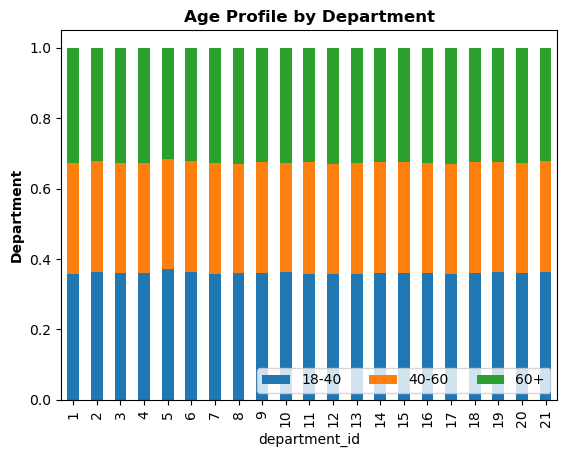

In [43]:
#Create a bar chart to visualize the relation between region and income groups

dept_age = crosstab_dept_age.plot(kind = 'bar', stacked = True)
plt.legend(loc = 'lower right', ncol = 4) 
plt.ylabel('Department', fontweight = 'bold')
plt.title('Age Profile by Department', fontweight = 'bold')
plt.show()

In [44]:
print(data_dict.get('4'))

{'department': 'produce'}


In [45]:
print(data_dict.get('16'))

{'department': 'dairy eggs'}


In [46]:
print(data_dict.get('19'))

{'department': 'snacks'}


Produce, dairy eggs and snacks are the most sought after departments. The customers are all proportionate across the age profiles.

In [47]:
print(data_dict.get('1'))

{'department': 'frozen'}


In [48]:
print(data_dict.get('7'))

{'department': 'beverages'}


## 6. Creating a profiling variable based on Income

In [49]:
# Creating an income_flag
income_flag = []
for value in df_combined['income']:
    if value < 75000:
        income_flag.append('Low-income')
    elif value >= 75000 and value < 150000:
        income_flag.append('Middle-income')
    elif value >= 150000:
        income_flag.append('High-income')
    else:
        print('Weird value:', row)

In [50]:
# Creating an income_flag column
df_combined['income_flag'] = income_flag

In [51]:
# Checking the frequency of the income_flag
df_combined['income_flag'].value_counts(dropna = False)

Middle-income    17910512
Low-income       10442766
High-income       4051581
Name: income_flag, dtype: int64

### 6.1 Creating a pie chart to show the distribution of Income

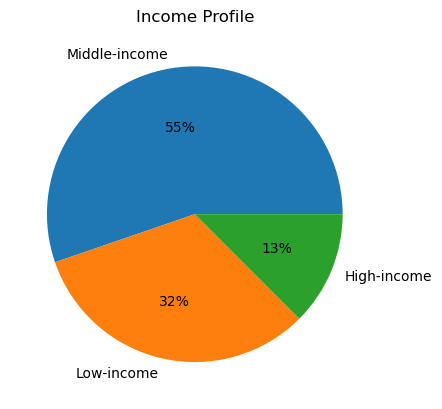

In [52]:
#income profile pie chart
income_profile_pie = df_combined['income_flag'].value_counts().plot.pie(title ='Income Profile', label = '', autopct=('%1.f%%'))

### 6.2 Aggregating the max, mean, and min variables of the Income profile for usage frequency and expenditure

In [53]:
# income aggregation by expenditure and usage frequency
income_agg = df_combined.groupby(['income_flag']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})

In [54]:
income_agg

days_since_prior_order                  prices                  \
                                 min   max       mean    min   max      mean   
income_flag                                                                    
High-income                      0.0  30.0  10.941393    1.0  25.0  7.941839   
Low-income                       0.0  30.0  11.240514    1.0  25.0  7.434725   
Middle-income                    0.0  30.0  11.061703    1.0  25.0  7.963122   

                             
                        sum  
income_flag                  
High-income    3.217700e+07  
Low-income     7.763910e+07  
Middle-income  1.426236e+08

### 6.3 Comparing Income profile by region

The income_pie_chart shows that most customers have a middle-income (75,000-150,000)

In [55]:
#Creating a crosstab of regions and income groups
crosstab_region_income = pd.crosstab(index = df_combined['region'], columns = df_combined['income_flag'], normalize = 'index')

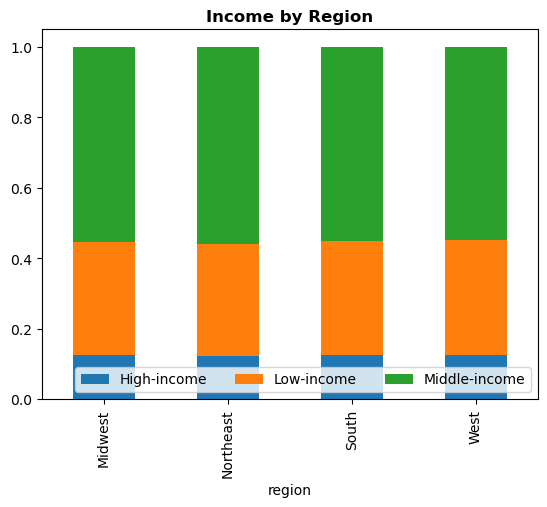

In [56]:
#Create a bar chart to visualize the relation between region and income groups

region_income = crosstab_region_income.plot(kind = 'bar', stacked = True)
plt.legend(loc = 'lower right', ncol = 4) 
plt.title('Income by Region', fontweight = 'bold')
plt.show()

### 6.4 Comparing Income profile by department_id

In [57]:
# create a crosstab of department and income
crosstab_dept_income = pd.crosstab(df_combined['department_id'], df_combined['income_flag'], normalize = 'index')

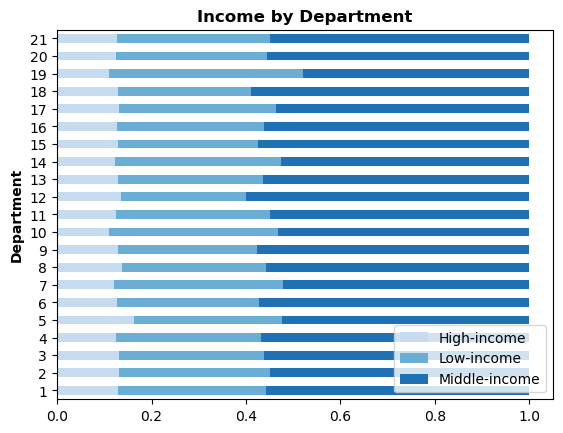

In [58]:
# stacked bar chart of department broken down by income group
dept_income = crosstab_dept_income.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Income by Department', fontweight = 'bold')
plt.show()


In [59]:
print(data_dict.get('4'))
print(data_dict.get('16'))
print(data_dict.get('19'))

{'department': 'produce'}
{'department': 'dairy eggs'}
{'department': 'snacks'}


## 7. Creating a profiling variable based on number of dependants

Creating the 'family_profile' based on the following:

18-40  with dependants 		Young with children

18-40 with no dependants	Young, no children

40-60 with dependants		Middle-aged with children

40-60 with no dependants	Middle-aged, no children

60 + with dependants		Elderly with children

60+ with no dependants		Elderly, no children

In [60]:
df_combined.loc[(df_combined['age_profile'] == '18-40') & (df_combined['number_of_dependants'] >= 1), 'family_profile'] = 'Young with children'


In [61]:
df_combined.loc[(df_combined['age_profile'] == '40-60') & (df_combined['number_of_dependants'] >= 1), 'family_profile'] = 'Middle-aged with children'

In [62]:
df_combined.loc[(df_combined['age_profile'] == '60+') & (df_combined['number_of_dependants'] >= 1), 'family_profile'] = 'Elderly with children'

In [63]:
df_combined.loc[(df_combined['age_profile'] == '18-40') & (df_combined['number_of_dependants'] == 0), 'family_profile'] = 'Young, no children'

In [64]:
df_combined.loc[(df_combined['age_profile'] == '40-60') & (df_combined['number_of_dependants'] == 0), 'family_profile'] = 'Middle-aged, no children'

In [65]:
df_combined.loc[(df_combined['age_profile'] == '60+') & (df_combined['number_of_dependants'] == 0), 'family_profile'] = 'Elderly, no children'

In [66]:
df_combined['family_profile'].value_counts(dropna = False)

Young with children          8763439
Elderly with children        7928248
Middle-aged with children    7615669
Young, no children           2906607
Elderly, no children         2654591
Middle-aged, no children     2536305
Name: family_profile, dtype: int64

### 7.1 Creating visualisations to show the distribution of number of dependants

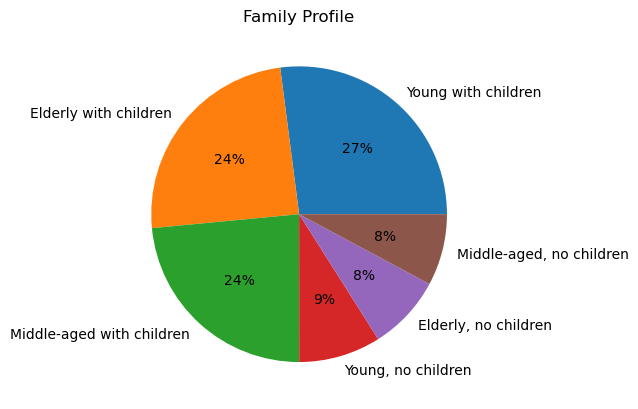

In [67]:
#Family status pie chart
family_profile_pie = df_combined['family_profile'].value_counts().plot.pie(title = 'Family Profile', label = '', autopct = ('%1.f%%'))

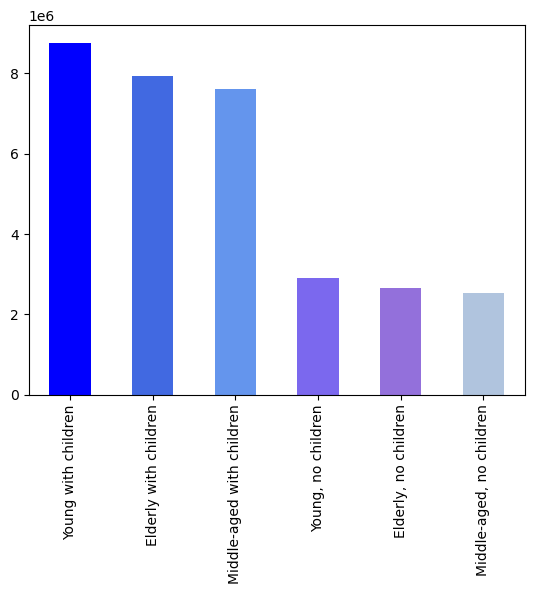

In [68]:
bar_family = df_combined['family_profile'].value_counts().plot.bar(color =['blue', 'royalblue', 'cornflowerblue', 'mediumslateblue', 'mediumpurple', 'lightsteelblue'])

### 7.2 Aggregating the max, mean, and min variables of the dependants profile for usage frequency and expenditure

In [69]:
# family status aggregations for expenditure and usage frequency
family_agg = df_combined.groupby(['family_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})

In [70]:
family_agg

days_since_prior_order                  prices  \
                                             min   max       mean    min   
family_profile                                                             
Elderly with children                        0.0  30.0  11.097943    1.0   
Elderly, no children                         0.0  30.0  11.039576    1.0   
Middle-aged with children                    0.0  30.0  11.156713    1.0   
Middle-aged, no children                     0.0  30.0  11.006523    1.0   
Young with children                          0.0  30.0  11.085407    1.0   
Young, no children                           0.0  30.0  11.183338    1.0   

                                                        
                            max      mean          sum  
family_profile                                          
Elderly with children      25.0  7.794163  61794058.53  
Elderly, no children       25.0  7.798087  20700732.59  
Middle-aged with children  25.0  7.789852  59324932.88  
Middle-aged, no children   25.0  7.790794  19759829.00  
Young with children        25.0  7.787743  68247412.60  
Young, no children         25.0  7.779768  22612727.23

In [71]:
# Since there is a huge difference between those with dependants and those without, I am creating a column for dependant_status to see if there are changes across region and departments
df_combined.loc[df_combined['number_of_dependants'] >= 1, 'dependant_status'] = 'with children'

In [72]:
df_combined.loc[df_combined['number_of_dependants'] == 0, 'dependant_status'] = 'no children'

In [73]:
df_combined['dependant_status'].value_counts(dropna = False)

with children    24307356
no children       8097503
Name: dependant_status, dtype: int64

### 7.3 Comparing dependants profile by region

In [74]:
#Creating a crosstab of families and regions
crosstab_region_dependants = pd.crosstab(index = df_combined['region'], columns = df_combined['dependant_status'], normalize = 'index')

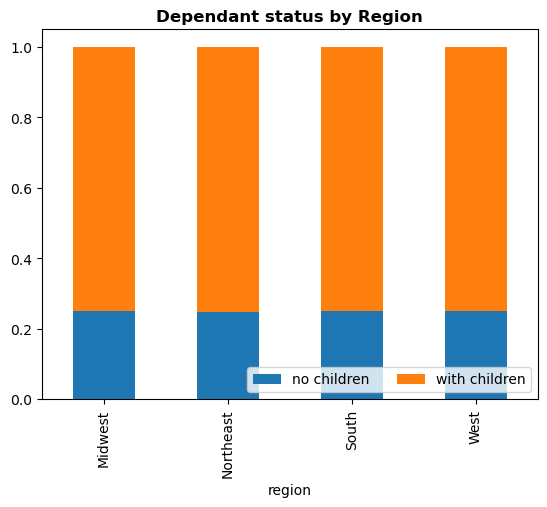

In [75]:
#Create a bar chart to visualize the relation between dependant status across regions

region_dependants = crosstab_region_dependants.plot(kind = 'bar', stacked = True)
plt.legend(loc = 'lower right', ncol = 4) 
plt.title('Dependant status by Region', fontweight = 'bold')
plt.show()

### 7.4 Comparing dependants by department_id

Most customer have dependants across all regions with the South reporting the most and the Northeast reporting the least.

In [76]:
#crosstab of dependant status and department
crosstab_department_dependants = pd.crosstab(df_combined['department_id'], df_combined['dependant_status'], normalize = 'index')

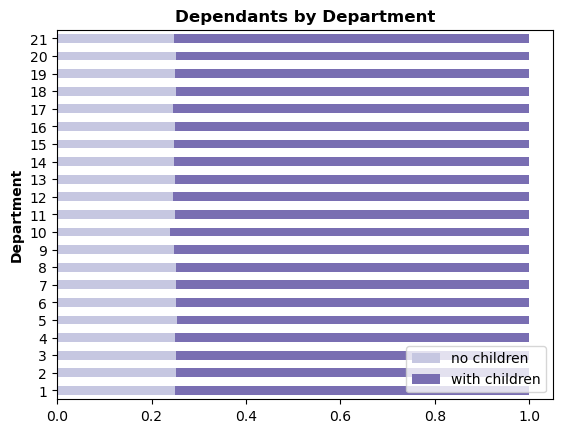

In [77]:
#stacked bar chart of family profiles by department
department_dependants = crosstab_department_dependants.plot(kind = 'barh', stacked = True, color = sns.color_palette('Purples', 2))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Dependants by Department', fontweight = 'bold')
plt.show()

In [78]:
print(data_dict.get('4'))
print(data_dict.get('16'))
print(data_dict.get('19'))
print(data_dict.get('1'))
print(data_dict.get('7'))

{'department': 'produce'}
{'department': 'dairy eggs'}
{'department': 'snacks'}
{'department': 'frozen'}
{'department': 'beverages'}


## 8. Checking order frequencies by Region

In [79]:
# Looking at the frequency of customer orders by region
df_combined['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

### 8.1 Creating a bar chart to show the number of orders by region

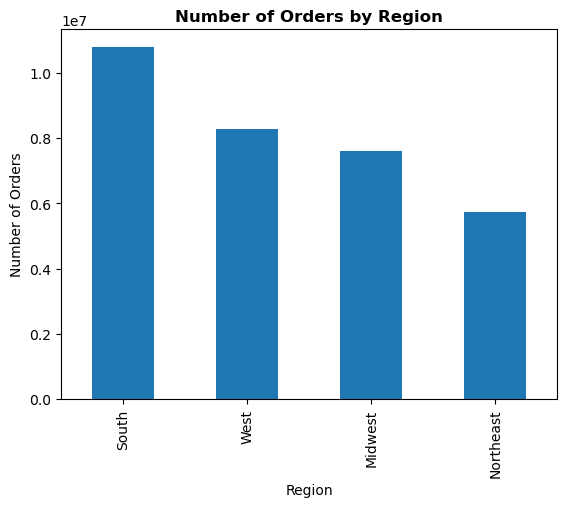

In [80]:
# Creating a bar chart to show the  number of orders by regions
region_orders_count = df_combined['region'].value_counts(dropna=False)
region_orders = region_orders_count.plot.bar()
plt.title('Number of Orders by Region', fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.show()

## 9. Creating a bar chart to show the busiest department by orders at 11am

In [81]:
# Looking at the departments frequency during the busiest hour
busiest_hour_department = df_combined[df_combined['order_hour_of_day'] == 11]

In [82]:
department_orders = busiest_hour_department['department_id'].value_counts(dropna=False)

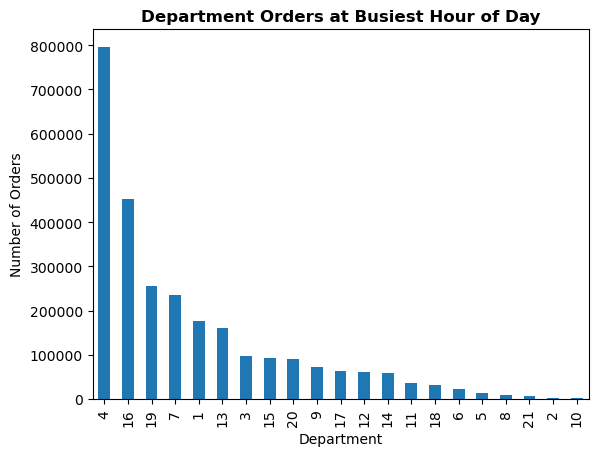

In [83]:
# Creating a bar chart to show the busiest department by orders at 11am.
busiest_department = department_orders.plot.bar()
plt.title('Department Orders at Busiest Hour of Day', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.show()

## 10. Creating a pie chart to show the price_range_loc on spending

In [84]:
# Looking at the frequency of price range products
df_combined['price_range_loc'].value_counts(dropna = False)

Mid-range product     21861558
Low-range product     10130750
High-range product      412551
Name: price_range_loc, dtype: int64

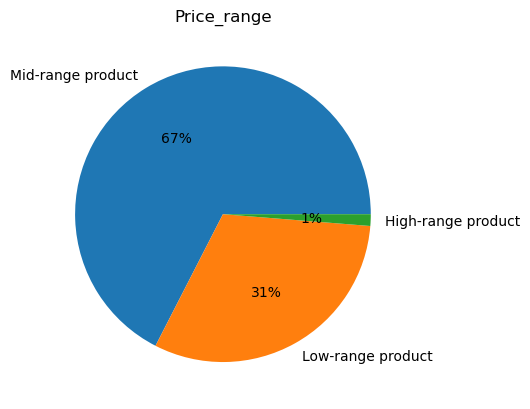

In [85]:
# Creating a pie chart on price_range_loc on spending
price_range_pie = df_combined['price_range_loc'].value_counts(dropna = False).plot.pie(title = 'Price_range', label = '', autopct = ('%1.f%%'))

Most customers purchase mid-range products and very few purchase from the high-range products.

## 10. Exporting Visualisations

In [86]:
path = r'C:\Users\User 1\Documents\Instacart Basket Analysis 04-2023'

In [87]:
# Exporting age_pie_chart
age_profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'age_profile_pie_chart.png'))

In [88]:
# Exporting region_age_stck_bar_chart
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'region_age.stck_bar.png'))

In [89]:
# Exporting dept_age_stck_bar_chart
dept_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'dept_age_stck_bar.png'))

In [90]:
# Exporting income_profile_pie_chart
income_profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'income_profile_pie.png'))

In [91]:
# Exporting region_income bar_chart
region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'region_income_bar.png'))

In [92]:
# Exporting dept_income_stck_bar_chart
dept_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'dept_income_stck_bar.png'))

In [93]:
# Exporting family_profile_pie_chart
family_profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'family_profile_pie.png'))

In [94]:
# Exporting bar_family
bar_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_family.png'))

In [95]:
# Exporting region_dependants_bar
region_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'region_dependants_bar.png'))

In [96]:
# Exporting department_dependants_stck_bar
department_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'department_dependants_stck_bar.png'))

In [97]:
# Exporting region_orders_count_bar_chart
region_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'region_orders_bar.png'))

In [98]:
# Exporting busiest_department_bar_chart
busiest_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'busiest_department_bar.png'))

In [99]:
# Exporting price_range_pie_chart
price_range_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'price_range_pie.png'))

In [100]:
# Checking the shape and head of the df_combined
df_combined.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,order_number,...,avg_price,spending_flag,median_frequency,order_frequency_flag,region,activity_flag,age_profile,income_flag,family_profile,dependant_status
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,7.988889,Low spender,19.0,Regular customer,Midwest,active,40-60,High-income,Middle-aged with children,with children
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,7.988889,Low spender,19.0,Regular customer,Midwest,active,40-60,High-income,Middle-aged with children,with children
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,7.988889,Low spender,19.0,Regular customer,Midwest,active,40-60,High-income,Middle-aged with children,with children
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,7.988889,Low spender,19.0,Regular customer,Midwest,active,40-60,High-income,Middle-aged with children,with children
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,7.988889,Low spender,19.0,Regular customer,Midwest,active,40-60,High-income,Middle-aged with children,with children


In [101]:
df_combined.shape

(32404859, 37)

In [102]:
#Exporting Dataframe
df_combined.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_dataset.pkl'))